In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

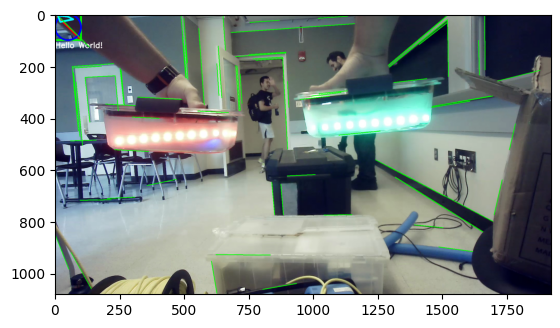

In [2]:
img = cv2.imread('image.jpg')
plt.imshow(img)

cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)

#polygon
pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
pts = pts.reshape((-1, 1, 2))
cv2.polylines(img, [pts], True, (0, 255, 255), 5)

cv2.putText(img, 'Hello World!', (0, 130), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)


#Hough Transform

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges, #what to draw lines on
                1, #number of lines on each edge
                (np.pi)/180,
                100,
                minLineLength=100, #down goes more frequent, up goes less
                maxLineGap=10, #inverse relation
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0,255, 0), 2)

plt.imshow(img)


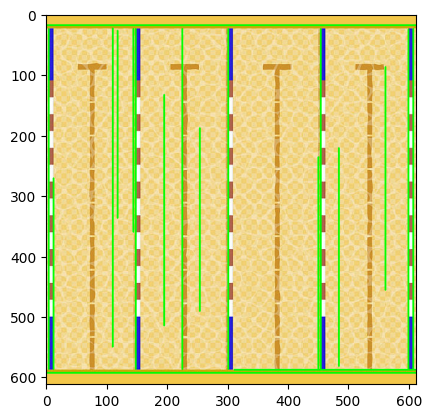

In [3]:
img = cv2.imread('pool.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
edges = cv2.Canny(gray, 50, 150, apertureSize=3) # detect edges
lines = cv2.HoughLinesP(
                edges, #what to draw lines on
                1, #number of lines on each edge
                (np.pi)/180,
                100,
                minLineLength=300, #down goes more frequent, up goes less
                maxLineGap=10, #inverse relation
        ) # detect lines

for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0,255, 0), 2)

plt.imshow(img)

(150.22705841064453, 99.35446548461914)
(466.7688980102539, 81.84619522094727)
(537.1041259765625, 374.8579406738281)
(319.1066589355469, 99.37282371520996)
(179.28412628173828, 322.4880828857422)


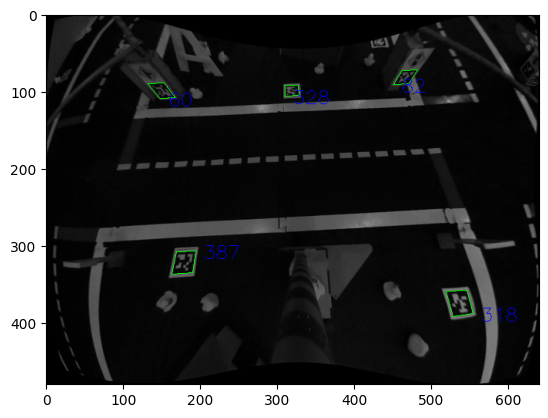

In [4]:
from dt_apriltags import Detector
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    center_x = sum(coord[0] for coord in tag.corners) / 4
    center_y = sum(coord[1] for coord in tag.corners) / 4
    print(str((center_x, center_y)))
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
    
plt.imshow(color_img)

In [5]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np

In [6]:

img = cv2.imread('rov_pool.jpg', cv2.IMREAD_GRAYSCALE)


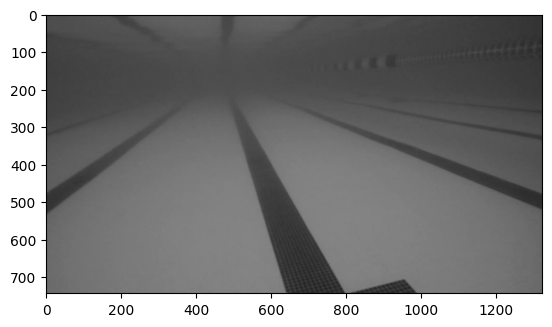

In [7]:

gray = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
plt.imshow(gray)

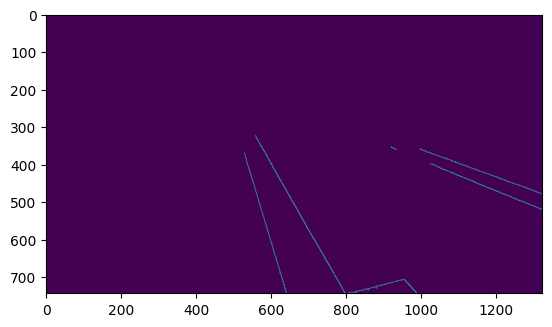

In [8]:

edges = cv2.Canny(gray, 120, 60, apertureSize=3) # detect edges
plt.imshow(edges)

In [9]:

lines = cv2.HoughLinesP(
                edges, #what to draw lines on
                1, #number of lines on each edge
                np.pi/180,
                100,
                minLineLength=350, #down goes more frequent, up goes less
                maxLineGap=100, #inverse relation
        ) # detect lines
i = 1
for line in lines:
    x1, y1, x2, y2 = line[0]
    print("Slope " + str(i) + ": " + str((y2 - y1)/(x2-x1)))
    theta = np.arctan((x2-x1)/(y2-y1))
    theta = np.round(np.degrees(theta), 2)
    print("Offset From Horizontal (degrees): " + str(theta))
    cv2.line(img, (x1, y1), (x2, y2), (255,0, 0), 2)
    i+=1



#plt.imshow(img)


Slope 1: 1.738396624472574
Offset From Horizontal (degrees): 29.91
Slope 2: 3.2990654205607477
Offset From Horizontal (degrees): 16.86


In [10]:
def get_slopes(line, m):

    x1, y1, x2, y2 = line[0]
    if (x2-x1) != 0:
        m.append((y2 - y1) / (x2 - x1))
    else:
        print("You monster!") #this would never really happen, never perfectly vertical

def get_intercepts(line, ints):
    x1, y1, x2, y2 = line[0]
    m=(y2 - y1) / (x2 - x1)
    ints.append(((0-y1)/m) + x1)

def detect_lines(img, thresh1, thresh2, aperture_Size, min_LineLength, max_LineGap):
    gray = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(gray, thresh1, thresh2, apertureSize=aperture_Size)
    lines = cv2.HoughLinesP(
                edges, #what to draw lines on
                1, #number of lines on each edge
                np.pi/180,
                100,
                minLineLength=min_LineLength, #down goes more frequent, up goes less 300
                maxLineGap=max_LineGap, #inverse relation 30
        ) # detect lines
    return (lines)
    #i = 1
    '''
    slopes = []
    for line in lines:
        slope = np.round(get_slope(line), 2)
        if slope not in slopes:
            slopes.append(slope)
            cv2.putText(img, f"slope = {slope}", (x2, y2), cv2.FONT_HERSHEY_DUPLEX, 1, (0,225,0), 3)
            
            theta = np.arctan((x2-x1)/(y2-y1))
            theta = np.round(np.degrees(theta), 2)
            cv2.putText(img, f"angle offset = {theta}", (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 1, (0,225,0), 3)
            cv2.line(img, (x1, y1), (x2, y2), (255,0, 0), 2)
        else:
            continue    
        #i+=1
    plt.imshow(img)
    '''
def detect_lanes(line_list):
    slopes = []
    intercepts = []
    valid_list1 = []
    valid_list2 = []
    lane_list = []
    indices = []
    mlist = []
    for line in line_list:
        get_slopes(line, slopes)
        get_intercepts(line, intercepts)
    
    print(slopes)
    print(intercepts)    
    
    slopes.sort()
    intercepts.sort()

    print(slopes)
    print(intercepts)   

    
    i=0
    for slope in slopes:
        if i == len(slopes) - 1:
            break
        '''
        if i == 0:
            continue
        if (slopes[i + 1] - slopes[i] < 100) and (intercepts[i + 1] - intercepts[i] < 600):
            valid_list1.append([line[i], line[i-1]])
        else:
            continue
        '''
        #print([lines[0, i], lines[0, i+1]])
        valid_list1.append("hello")
        i += 1
    

        

    
    '''
    for j in range(len(valid_list1)):
        pass
    '''
    print(valid_list1)
    return valid_list1

def draw_lines(imgin, thresh1in, thresh2in, aperture_Sizein, min_LineLengthin, max_LineGapin):
    lines = detect_lines(imgin, thresh1in, thresh2in, aperture_Sizein, min_LineLengthin, max_LineGapin)
    lines = detect_lanes(lines[0])
    print(lines)
    i = 0
    slopes_1 = []
    intercepts_1 = []
    for line in lines:

        x1, y1, x2, y2 = line[0]

        get_slopes(line, slopes_1)
        get_intercepts(line, intercepts_1)
        
        cv2.putText(imgin, f"slope = {slopes_1[i]}", (x2, y2), cv2.FONT_HERSHEY_DUPLEX, 1, (0,225,0), 3)

        theta = np.arctan((x2-x1)/(y2-y1))
        theta = np.round(np.degrees(theta), 2)
        cv2.putText(imgin, f"angle offset = {theta}", (x1, y1), cv2.FONT_HERSHEY_DUPLEX, 1, (0,225,0), 3)
        cv2.line(imgin, (x1, y1), (x2, y2), (255,0, 0), 2)
        i+=1
    plt.imshow(img)
    

In [11]:
cap = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = cap.read()

In [12]:

'''
count = 0
frequency = 100 #100 frames
while ret:
    if count % frequency == 0:
        #plt.imshow(cv2.cvtColor(detect(frame), cv2.COLOR_BGR2RGB))
        try:
            detect(frame)
        except:
            count += 1
            ret, frame = cap.read()
            continue
        count += 1
        ret, frame = cap.read()
    else:
        ret = False
'''

draw_lines(frame, 50, 50, 3, 300, 30)

TypeError: cannot unpack non-iterable numpy.int32 object